In [8]:
%load_ext autoreload
%autoreload 2

from simphony.libraries.ideal import Waveguide, Coupler
from simphony.circuit import Circuit
from simphony.simulation import ClassicalSim, Laser, Detector
import numpy as jnp
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
a = [1,2,3,4,5]
b = [1,2,3]
print(not isinstance(1, list))

True


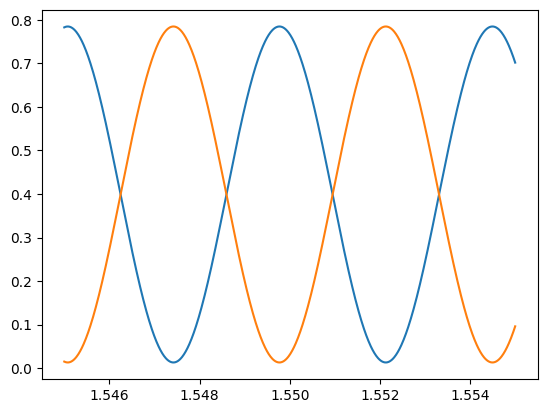

In [11]:
def mzi_factory(coupling, loss, length, phi):
    ckt = Circuit()
    wg = Waveguide(length=length)
    coupler1 = Coupler(loss=loss, coupling=coupling, phi=phi)
    coupler2 = Coupler(loss=loss, coupling=coupling)
    ckt.connect(coupler1.o(3), coupler2.o(1))
    ckt.connect(coupler1.o(2), wg.o(0))
    ckt.connect(wg.o(1), coupler2.o(0))
    ckt.expose()
    laser = Laser(ckt, port=ckt.o(0))
    detector = Detector(ckt, port=ckt.o(2))
    return ckt

ckt = mzi_factory(coupling=0.50, loss=0.0, length=150, phi=0)
wls = jnp.linspace(1.545, 1.555, 1000)
sim = ClassicalSim(ckt=ckt, wl=jnp.array(wls))
result = sim.run()
plt.plot(wls, abs(result.output[:,2])**2)
plt.plot(wls, abs(result.output[:,3])**2)
plt.show()

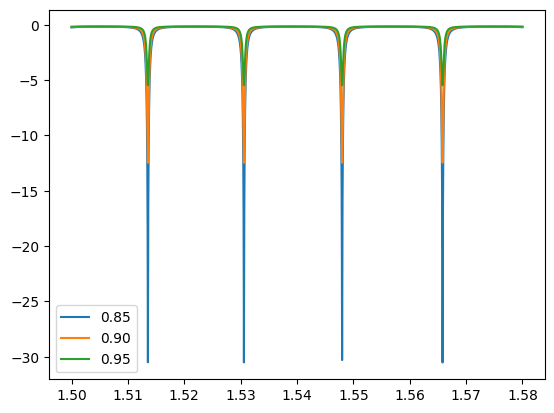

In [24]:
# Laser and detectors added after circuit creation
def ring_factory(coupling, loss, length, phi):
    ckt = Circuit()
    wg = Waveguide(length=length)
    coupler = Coupler(loss=loss, coupling=coupling, phi=phi)
    ckt.connect(wg.o(0), coupler.o(1))
    ckt.connect(wg.o(1), coupler.o(2))
    ckt.expose()
    laser = Laser(ckt, port=ckt.o(0))
    detector = Detector(ckt, port=ckt.o(1))
    return ckt


prev_sparam = None
for coupling in jnp.linspace(0.85, 0.95, 3):
    ckt = ring_factory(coupling=coupling, loss=-0.15, length=40)
    wls = jnp.linspace(1.5, 1.58, 10000)
    sim = ClassicalSim(ckt=ckt, wl=jnp.array(wls))
    result = sim.run()
    if prev_sparam is not None:
        if jnp.allclose(result.s_params, prev_sparam):
            print('same')
    prev_sparam = result.s_params
    plt.plot(wls, 10*jnp.log10(abs(result.output[:,1])**2), label=f'{coupling:.2f}')
plt.legend()
plt.show()


In [25]:
# Laser and dectectors added during circuit creation

ckt = Circuit()
wg = Waveguide(length=1)
coupler = Coupler()
laser = Laser()
detector = Detector()
ckt.connect(wg.o(0), coupler.o(1))
ckt.connect(wg.o(1), coupler.o(2))
ckt.connect(laser, coupler)
ckt.connect(detector, coupler)

freq = np.linspace(1.53, 1.57, 100)
sim = ClassicalSim(ckt=ckt, freq=freq)
result = sim.run()

TypeError: Laser.__init__() missing 2 required positional arguments: 'ckt' and 'port'

In [ ]:
# Laser and dectectors added during simulation creation

ckt = Circuit()
wg = Waveguide(length=1)
coupler = Coupler()
ckt.connect(wg.o(0), coupler.o(1))
ckt.connect(wg.o(1), coupler.o(2))
ckt.expose()

freq = np.linspace(1.53, 1.57, 100)
sim = ClassicalSim(ckt=ckt, freq=freq)
laser = Laser(ckt, port=sim.o(0))
detector = Detector(ckt, port=sim.o(1))
result = sim.run()

In [ ]:
# example quantum simulation
from simphony.simulation import QuantumSim, SqueezedState, CoherentState
from simphony.circuit import Circuit

# circcuit 
ckt = Circuit()
wg1 = Waveguide(length=1)
wg2 = Waveguide(length=3)
coupler1 = Coupler(coupling=0.75, loss=0.1)
ckt.connect()

# define input states
state1 = SqueezedState(0.5, 0.5)
state2 = CoherentState(0.5)

freq = 1.55
sim = QuantumSim(ckt=ckt, freq=freq)
